In [3]:
#!pip uninstall umap
#!pip install umap-learn
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [10]:
# mnist dataset
mnist = load_digits()

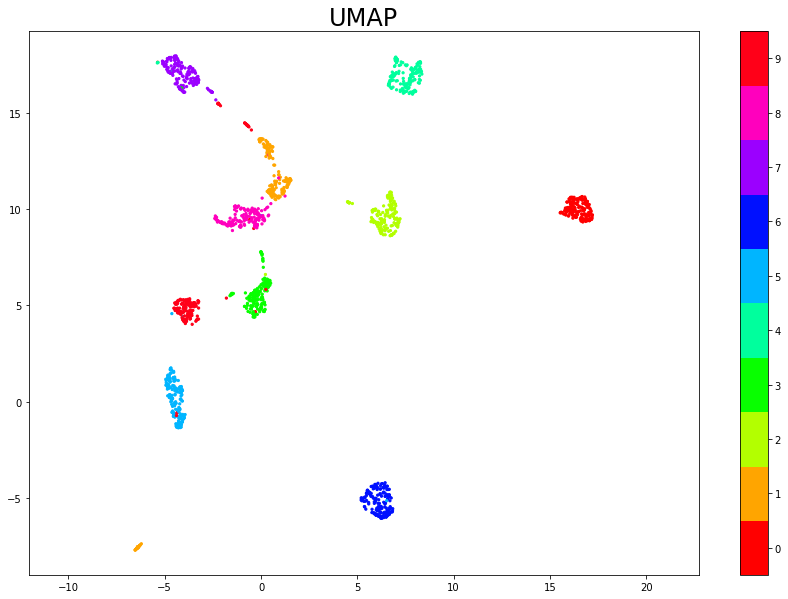

In [27]:
#umap
umap = UMAP(random_state=20)
embedding = umap.fit_transform(mnist.data)
plt.figure(figsize=(15,10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='hsv', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP', fontsize=24);

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


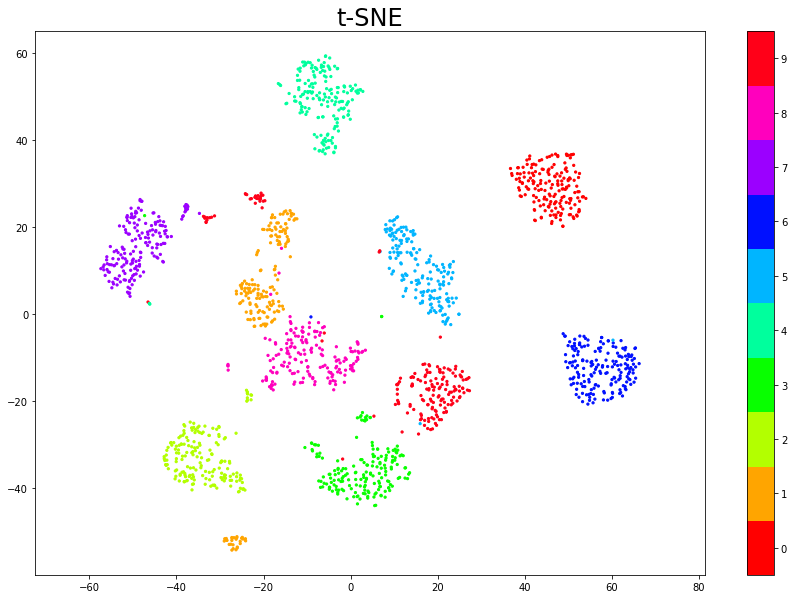

In [28]:
#t-sne
tsne = TSNE(n_components=2, random_state=20)
embedding = tsne.fit_transform(mnist.data)
plt.figure(figsize=(15,10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='hsv', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("t-SNE", fontsize=24);

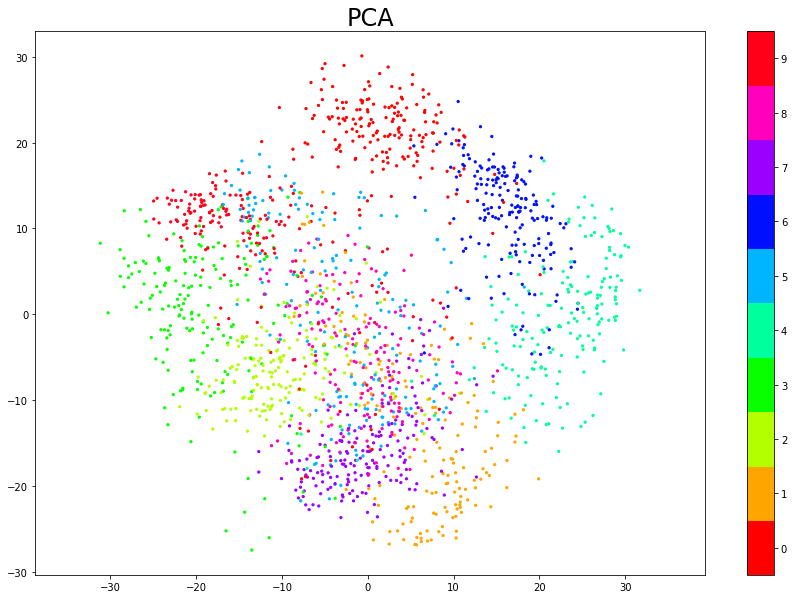

In [29]:
#pca
pca = PCA(n_components=2, random_state=20)
embedding = pca.fit_transform(mnist.data)
plt.figure(figsize=(15,10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='hsv', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("PCA", fontsize=24);